In [35]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/sebastian/Documents/KTH/Year 1/DD2437 Artificial Neural Networks and Deep Architectures/lab_repo/DD2437_ANNs/lab2')
from rdf import *
from helper import *


## Assignment part 1

### Train data and initial testing

In [36]:
# Training data
x_train = np.arange(0,2*np.pi,0.1)
y_sin_train = np.sin(2*x_train)
y_square_train = np.sign(y_sin_train) # # 1 if sin(2x) >= 0, else -1

# Testing data
x_test = np.arange(0.5,2*np.pi,0.1)
y_sin_test = np.sin(2*x_test)
y_square_test = np.sign(y_sin_test) # # 1 if sin(2x) >= 0, else -1

print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

Training samples: 63
Testing samples: 58


In [37]:
#Define RDF parameters
num_centers = 1
centers = np.linspace(0, 2 * np.pi, num_centers)
sigma = 0.5

# Train and test for sin(2x)
rbf_sin_network = RBFNetwork(centers=centers,sigma=sigma)
rbf_sin_network.fit(x_train,y_sin_train)
y_sin_pred_train = rbf_sin_network.predict(x_train)
y_sin_pred_test = rbf_sin_network.predict(x_test)

# Train and test for square(2x)
rbf_square = RBFNetwork(centers, sigma)
rbf_square.fit(x_train, y_square_train)
y_square_pred_train = rbf_square.predict(x_train)
y_square_pred_test = rbf_square.predict(x_test)


absolute_error_sin = np.abs(y_sin_test - y_sin_pred_test)
absolute_error_square = np.abs(y_square_test - y_square_pred_test)

print(f"Absolute error for sin(2x) on test set: {np.mean(absolute_error_sin):.4f}")
print(f"Absolute error for square(2x) on test set: {np.mean(absolute_error_square):.4f}")


Absolute error for sin(2x) on test set: 0.6285
Absolute error for square(2x) on test set: 0.9543


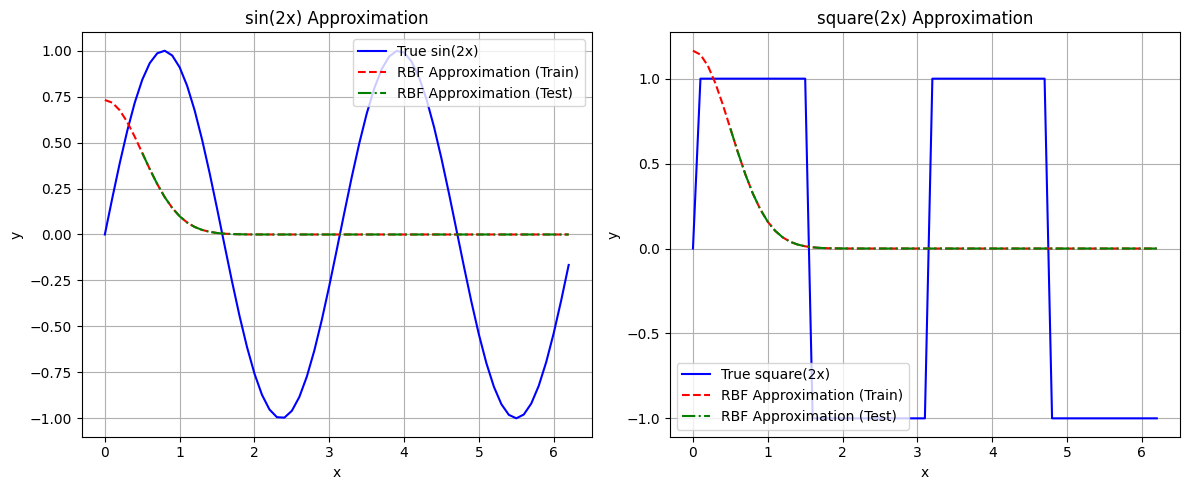

In [38]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(x_train, y_sin_train, label='True sin(2x)', color='blue')
plt.plot(x_train, y_sin_pred_train, label='RBF Approximation (Train)', color='red', linestyle='--')
plt.plot(x_test, y_sin_pred_test, label='RBF Approximation (Test)', color='green', linestyle='-.')
plt.title('sin(2x) Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_train, y_square_train, label='True square(2x)', color='blue')
plt.plot(x_train, y_square_pred_train, label='RBF Approximation (Train)', color='red', linestyle='--')
plt.plot(x_test, y_square_pred_test, label='RBF Approximation (Test)', color='green', linestyle='-.')
plt.title('square(2x) Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Part 3.1 Batch mode training using least squares - supervised learning of network weights

**Try to vary the number of units to obtain the absolute residual error below 0.1, 0.01 and 0.001 in the residual value (absolute residual error is understood as the average absolute difference between the network outputs and the desirable target values). Please discuss the results, how many units are needed for the aforementioned error thresholds?**

In [39]:
absolute_error_sin__test_list = []
absolute_error_square__test_list = []
absolute_error_sin__train_list = []
absolute_error_square__train_list = []

num_centroids = 50
sigma = 0.5


for num_centers in range(1, num_centroids+1): 

    #print(f"Number centroids:{num_centers}")

    centers = np.linspace(0, 2 * np.pi, num_centers)

    # Train and test for sin(2x)
    rbf_sin_network = RBFNetwork(centers=centers,sigma=sigma)
    rbf_sin_network.fit(x_train,y_sin_train)
    y_sin_pred_train = rbf_sin_network.predict(x_train)
    y_sin_pred_test = rbf_sin_network.predict(x_test)


    # Train and test for square(2x)
    rbf_square = RBFNetwork(centers, sigma)
    rbf_square.fit(x_train, y_square_train)
    y_square_pred_train = rbf_square.predict(x_train)
    y_square_pred_test = rbf_square.predict(x_test)

    absolute_error_sin__test_list.append(np.mean(np.abs(y_sin_test - y_sin_pred_test)))
    absolute_error_square__test_list.append(np.mean(np.abs(y_square_test - y_square_pred_test)))
    absolute_error_sin__train_list.append(np.mean(np.abs(y_sin_train - y_sin_pred_train)))
    absolute_error_square__train_list.append(np.mean(np.abs(y_square_train - y_square_pred_train)))  

In [40]:
len(absolute_error_sin__test_list)

50

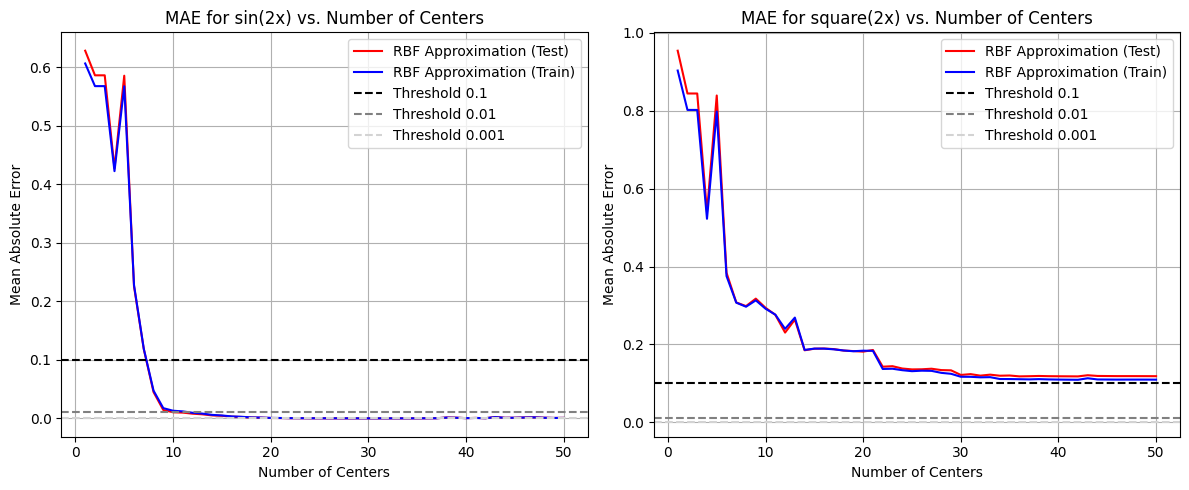

In [41]:
x_axis = list(range(1, num_centroids + 1)) 

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_axis, absolute_error_sin__test_list, color= 'red', label='RBF Approximation (Test)')
plt.plot(x_axis, absolute_error_sin__train_list, color= 'blue', label='RBF Approximation (Train)')

plt.axhline(y=0.1, color='black', linestyle='--', label='Threshold 0.1')
plt.axhline(y=0.01, color='gray', linestyle='--', label='Threshold 0.01')
plt.axhline(y=0.001, color='lightgray', linestyle='--', label='Threshold 0.001')

plt.xlabel('Number of Centers')
plt.ylabel('Mean Absolute Error')
plt.title('MAE for sin(2x) vs. Number of Centers')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_axis, absolute_error_square__test_list, color= 'red', label='RBF Approximation (Test)')
plt.plot(x_axis, absolute_error_square__train_list, color= 'blue', label='RBF Approximation (Train)')

plt.axhline(y=0.1, color='black', linestyle='--', label='Threshold 0.1')
plt.axhline(y=0.01, color='gray', linestyle='--', label='Threshold 0.01')
plt.axhline(y=0.001, color='lightgray', linestyle='--', label='Threshold 0.001')

plt.xlabel('Number of Centers')
plt.ylabel('Mean Absolute Error')
plt.title('MAE for square(2x) vs. Number of Centers')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

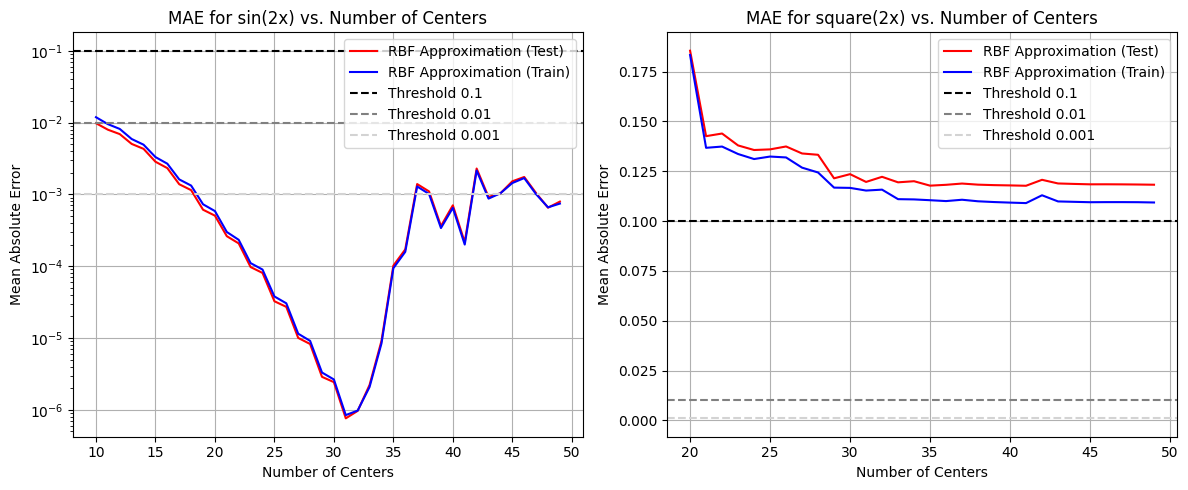

In [42]:
zoom = 10
x_axis = list(range(zoom, num_centroids))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_axis, absolute_error_sin__test_list[zoom:], color='red', label='RBF Approximation (Test)')
plt.plot(x_axis, absolute_error_sin__train_list[zoom:], color='blue', label='RBF Approximation (Train)')

plt.axhline(y=0.1, color='black', linestyle='--', label='Threshold 0.1')
plt.axhline(y=0.01, color='gray', linestyle='--', label='Threshold 0.01')
plt.axhline(y=0.001, color='lightgray', linestyle='--', label='Threshold 0.001')

plt.xlabel('Number of Centers')
plt.ylabel('Mean Absolute Error')
plt.title('MAE for sin(2x) vs. Number of Centers')
plt.grid(True)
plt.yscale('log')
plt.legend()

zoom = 20
x_axis = list(range(zoom, num_centroids))

plt.subplot(1, 2, 2)
plt.plot(x_axis, absolute_error_square__test_list[zoom:], color='red', label='RBF Approximation (Test)')
plt.plot(x_axis, absolute_error_square__train_list[zoom:], color='blue', label='RBF Approximation (Train)')

plt.axhline(y=0.1, color='black', linestyle='--', label='Threshold 0.1')
plt.axhline(y=0.01, color='gray', linestyle='--', label='Threshold 0.01')
plt.axhline(y=0.001, color='lightgray', linestyle='--', label='Threshold 0.001')

plt.xlabel('Number of Centers')
plt.ylabel('Mean Absolute Error')
plt.title('MAE for square(2x) vs. Number of Centers')
plt.grid(True)
#plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

**How can you simply transform the output of your RBF network to re- duce the residual error to 0 for the square(2x) problem? Still, how many units do you need? In what type of applications could this transform be particularly useful?**

In [43]:
absolute_error_square__test_list = []
absolute_error_square__train_list = []

num_centroids = 10
sigma = 0.5


for num_centers in range(1, num_centroids+1): 

    centers = np.linspace(0, 2 * np.pi, num_centers)

    # Train and test for square(2x)
    rbf_square = RBFNetwork(centers, sigma)
    rbf_square.fit(x_train, y_square_train)
    y_square_pred_train = rbf_square.predict(x_train)
    y_square_pred_test = rbf_square.predict(x_test)
    y_square_pred_test_threshold = np.sign(y_square_pred_test)
    y_square_pred_train_threshold = np.sign(y_square_pred_train)
    

    absolute_error_square__test_list.append(np.mean(np.abs(y_square_test - y_square_pred_test_threshold)))
    absolute_error_square__train_list.append(np.mean(np.abs(y_square_train - y_square_pred_train_threshold)))  

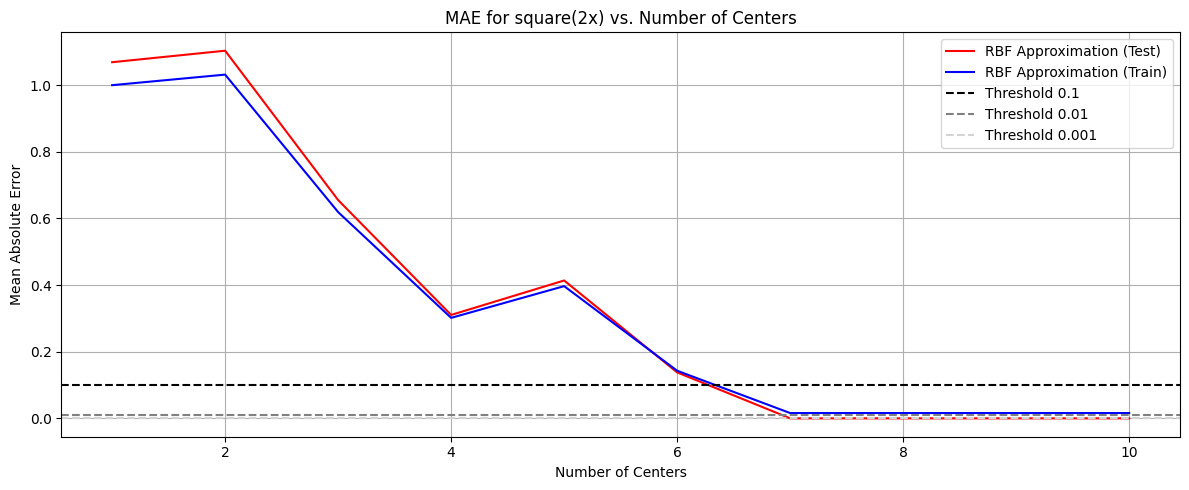

In [44]:
x_axis = list(range(1, num_centroids + 1)) 

plt.figure(figsize=(12, 5))

plt.plot(x_axis, absolute_error_square__test_list, color= 'red', label='RBF Approximation (Test)')
plt.plot(x_axis, absolute_error_square__train_list, color= 'blue', label='RBF Approximation (Train)')

plt.axhline(y=0.1, color='black', linestyle='--', label='Threshold 0.1')
plt.axhline(y=0.01, color='gray', linestyle='--', label='Threshold 0.01')
plt.axhline(y=0.001, color='lightgray', linestyle='--', label='Threshold 0.001')

plt.xlabel('Number of Centers')
plt.ylabel('Mean Absolute Error')
plt.title('MAE for square(2x) vs. Number of Centers')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
#Define RDF parameters
num_centers = 8
centers = np.linspace(0, 2 * np.pi, num_centers)
sigma = 0.5

# Train and test for square(2x)
rbf_square = RBFNetwork(centers, sigma)
rbf_square.fit(x_train, y_square_train)
y_square_pred_train = rbf_square.predict(x_train)
y_square_pred_test = rbf_square.predict(x_test)
y_square_pred_test_threshold = np.sign(y_square_pred_test)
y_square_pred_train_threshold = np.sign(y_square_pred_train)

absolute_error_square = np.abs(y_square_test - y_square_pred_test_threshold)


print(f"Absolute error for square(2x) on test set: {np.mean(absolute_error_square):.4f}")


Absolute error for square(2x) on test set: 0.0000


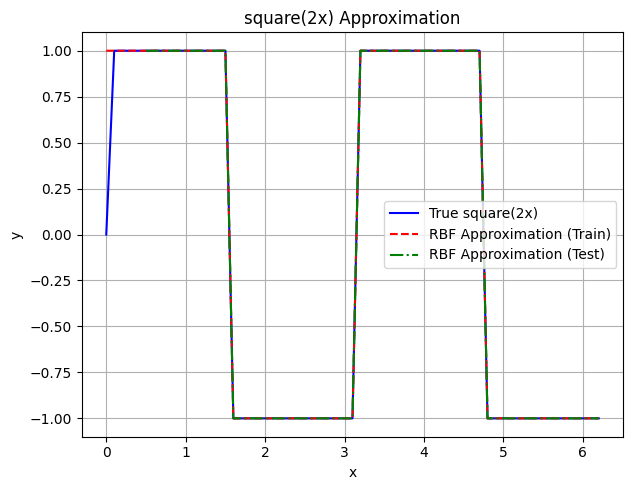

In [46]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 2)
plt.plot(x_train, y_square_train, label='True square(2x)', color='blue')
plt.plot(x_train, y_square_pred_train_threshold, label='RBF Approximation (Train)', color='red', linestyle='--')
plt.plot(x_test, y_square_pred_test_threshold, label='RBF Approximation (Test)', color='green', linestyle='-.')
plt.title('square(2x) Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [47]:
#TODO We should probably also look into how different variances for different number of centroids affect the performance 
#       -> Create a heatmap (different number of centroids, different variances)

### 3.1 Regression with noise

In [48]:
# Training data
x_train = np.arange(0,2*np.pi,0.1)
y_sin_train = np.sin(2*x_train)
y_square_train = np.sign(y_sin_train) # # 1 if sin(2x) >= 0, else -1

# Testing data
x_test = np.arange(0.5,2*np.pi,0.1)
y_sin_test = np.sin(2*x_test)
y_square_test = np.sign(y_sin_test) # # 1 if sin(2x) >= 0, else -1

#Adding zero-mean Gaussian noise with the variance of 0.1 (both training and testing set)

np.random.seed(41)
variance=0.1

noise_01_train = np.random.normal(0,np.sqrt(variance),x_train.shape)
noise_01_test = np.random.normal(0,np.sqrt(variance),x_test.shape)

y_sin_test_noise = y_sin_test + noise_01_test
y_sin_train_noise = y_sin_train + noise_01_train

y_square_test_noise = y_square_test + noise_01_test
y_square_train_noise = y_square_train + noise_01_train


print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

Training samples: 63
Testing samples: 58


#### Experiments with noisy data

In [49]:
import numpy as np

#parameters
num_centers_list = [5, 10, 15, 20, 25]  
sigma_list = [0.1, 0.5, 1.0, 2.0, 5.0]  
eta_list = [0.001, 0.01, 0.1]  
num_epochs = 50

results_batch = {}
results_online = {}


#batch learning experiments
for sigma in sigma_list:
    for num_centers in num_centers_list:
        centers = np.linspace(0, 2 * np.pi, num_centers)
        
        #sin
        rbf_sin = RBFNetwork(centers, sigma)
        rbf_sin.fit(x_train, y_sin_train_noise)
        y_pred_sin = rbf_sin.predict(x_test)
        mae_sin = mae(y_sin_test_noise, y_pred_sin)
        
        #square
        rbf_square = RBFNetwork(centers, sigma)
        rbf_square.fit(x_train, y_square_train_noise)
        y_pred_square = rbf_square.predict(x_test)
        mae_square = mae(y_square_test_noise, y_pred_square)
        
        #safe results
        key = f"sigma_{sigma}_centers_{num_centers}"
        results_batch[key] = {'sin': mae_sin, 'square': mae_square}

#online learning experiments
for eta in eta_list:
    for sigma in sigma_list:
        for num_centers in num_centers_list:
            centers = np.linspace(0, 2 * np.pi, num_centers)
            
            # Sin
            rbf_sin = RBFNetwork(centers, sigma)
            train_hist_sin, test_hist_sin = rbf_sin.fit_online(x_train, y_sin_train_noise, x_test, y_sin_test_noise, eta, num_epochs)
            mae_sin_online = test_hist_sin[-1]  
            
            # Square
            rbf_square = RBFNetwork(centers, sigma)
            train_hist_square, test_hist_square = rbf_square.fit_online(x_train, y_square_train_noise, x_test, y_square_test_noise, eta, num_epochs)
            mae_square_online = test_hist_square[-1]
            
            key = f"eta_{eta}_sigma_{sigma}_centers_{num_centers}"
            results_online[key] = {'sin': mae_sin_online, 'square': mae_square_online, 'train_hist_sin': train_hist_sin, 'test_hist_sin': test_hist_sin, 'train_hist_square': train_hist_square, 'test_hist_square': test_hist_square}



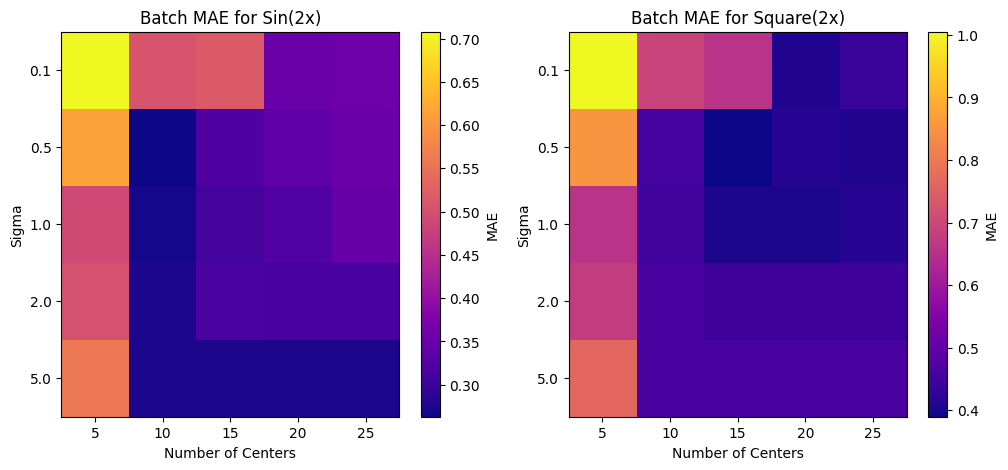

In [56]:
#heatmap for batch: sigma vs centers
mae_sin_batch_matrix = np.zeros((len(sigma_list), len(num_centers_list)))
mae_square_batch_matrix = np.zeros((len(sigma_list), len(num_centers_list)))

for i, sigma in enumerate(sigma_list):
    for j, num_centers in enumerate(num_centers_list):
        key = f"sigma_{sigma}_centers_{num_centers}"
        mae_sin_batch_matrix[i, j] = results_batch[key]['sin']
        mae_square_batch_matrix[i, j] = results_batch[key]['square']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(mae_sin_batch_matrix, cmap='plasma', aspect='auto')
plt.colorbar(label='MAE')
plt.xticks(range(len(num_centers_list)), num_centers_list)
plt.yticks(range(len(sigma_list)), sigma_list)
plt.xlabel('Number of Centers')
plt.ylabel('Sigma')
plt.title('Batch MAE for Sin(2x)')

plt.subplot(1, 2, 2)
plt.imshow(mae_square_batch_matrix, cmap='plasma', aspect='auto')
plt.colorbar(label='MAE')
plt.xticks(range(len(num_centers_list)), num_centers_list)
plt.yticks(range(len(sigma_list)), sigma_list)
plt.xlabel('Number of Centers')
plt.ylabel('Sigma')
plt.title('Batch MAE for Square(2x)')
plt.show()

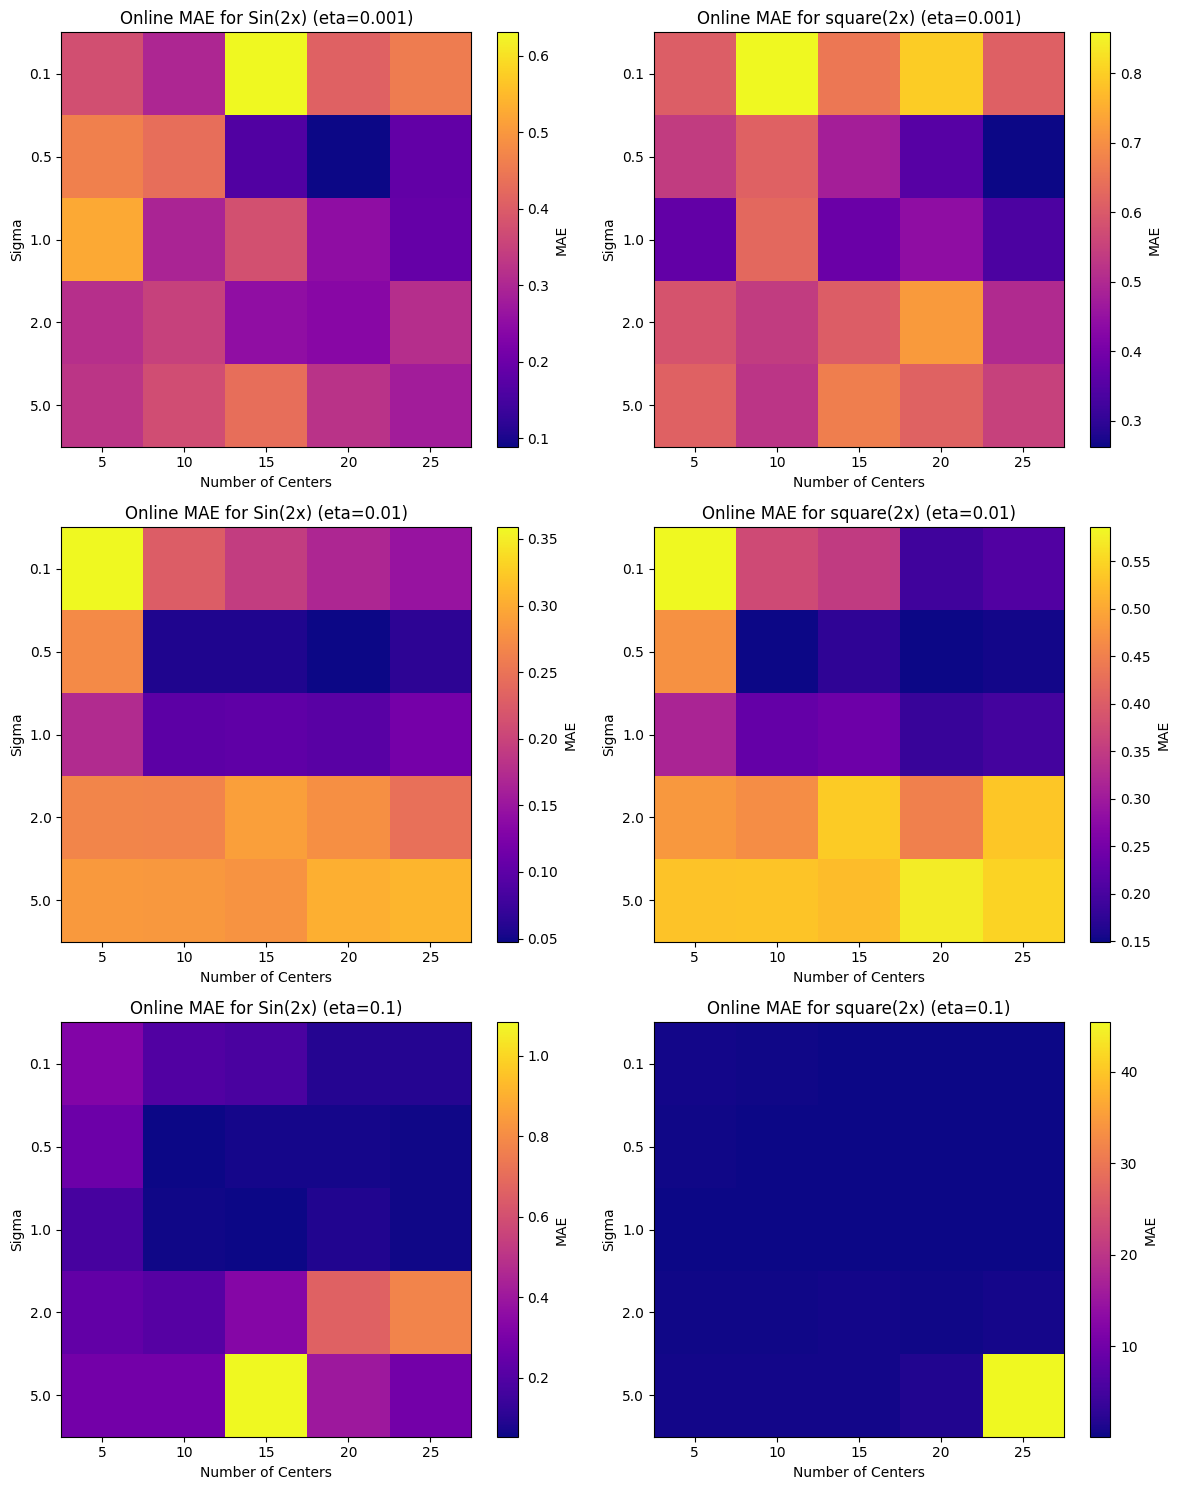

In [ ]:
plt.figure(figsize=(12, 15)) #shows 6*2 images

for idx, eta in enumerate(eta_list):
    mae_sin_online_matrix = np.zeros((len(sigma_list), len(num_centers_list)))
    mae_square_online_matrix = np.zeros((len(sigma_list), len(num_centers_list)))

    for i, sigma in enumerate(sigma_list):
        for j, num_centers in enumerate(num_centers_list):
            key = f"eta_{eta}_sigma_{sigma}_centers_{num_centers}"
            mae_sin_online_matrix[i, j] = results_online[key]['sin']
            mae_square_online_matrix[i, j] = results_online[key]['square']

    plt.subplot(3, 2, 2*idx + 1)
    plt.imshow(mae_sin_online_matrix, cmap='plasma', aspect='auto')
    plt.colorbar(label='MAE')
    plt.xticks(range(len(num_centers_list)), num_centers_list)
    plt.yticks(range(len(sigma_list)), sigma_list)
    plt.xlabel('Number of Centers')
    plt.ylabel('Sigma')
    plt.title(f'Online MAE for Sin(2x) (eta={eta})')

    plt.subplot(3, 2, 2*idx + 2)
    plt.imshow(mae_square_online_matrix, cmap='plasma', aspect='auto')
    plt.colorbar(label='MAE')
    plt.xticks(range(len(num_centers_list)), num_centers_list)
    plt.yticks(range(len(sigma_list)), sigma_list)
    plt.xlabel('Number of Centers')
    plt.ylabel('Sigma')
    plt.title(f'Online MAE for square(2x) (eta={eta})')

plt.tight_layout()
plt.show()

In [52]:
# Positioning comparison: evenly distributed vs random
num_centers_pos = 10
sigma_pos = 0.5

centers_linspace = np.linspace(0, 2 * np.pi, num_centers_pos)
centers_random = np.random.uniform(0, 2 * np.pi, num_centers_pos)

#batch with evenly distributed
rbf_sin_lin = RBFNetwork(centers_linspace, sigma_pos)
rbf_sin_lin.fit(x_train, y_sin_train_noise)
mae_sin_lin = mae(y_sin_test_noise, rbf_sin_lin.predict(x_test))

rbf_square_lin = RBFNetwork(centers_linspace, sigma_pos)
rbf_square_lin.fit(x_train, y_square_train_noise)
mae_square_lin = mae(y_square_test_noise, rbf_square_lin.predict(x_test))

#batch with random
rbf_sin_rand = RBFNetwork(centers_random, sigma_pos)
rbf_sin_rand.fit(x_train, y_sin_train_noise)
mae_sin_rand = mae(y_sin_test_noise, rbf_sin_rand.predict(x_test))

rbf_square_rand = RBFNetwork(centers_random, sigma_pos)
rbf_square_rand.fit(x_train, y_square_train_noise)
mae_square_rand = mae(y_square_test_noise, rbf_square_rand.predict(x_test))

print(f"MAE Sin -------------------------------------\n Evenly distributed: {mae_sin_lin:.4f}, Random: {mae_sin_rand:.4f}\n---------------------------------------------")
print(f"MAE Square ----------------------------------\n- Evenly distributed: {mae_square_lin:.4f}, Random: {mae_square_rand:.4f}\n---------------------------------------------")

#test on clean data
mae_sin_clean = mae(y_sin_test, rbf_sin_lin.predict(x_test))
mae_square_clean = mae(y_square_test, rbf_square_lin.predict(x_test))

print(f"Clean data MAE (evenly distributed) - Sin: {mae_sin_clean:.4f}, Square: {mae_square_clean:.4f}")

MAE Sin -------------------------------------
 Evenly distributed: 0.2630, Random: 0.3112
---------------------------------------------
MAE Square ----------------------------------
- Evenly distributed: 0.4547, Random: 0.4253
---------------------------------------------
Clean data MAE (evenly distributed) - Sin: 0.0875, Square: 0.3148


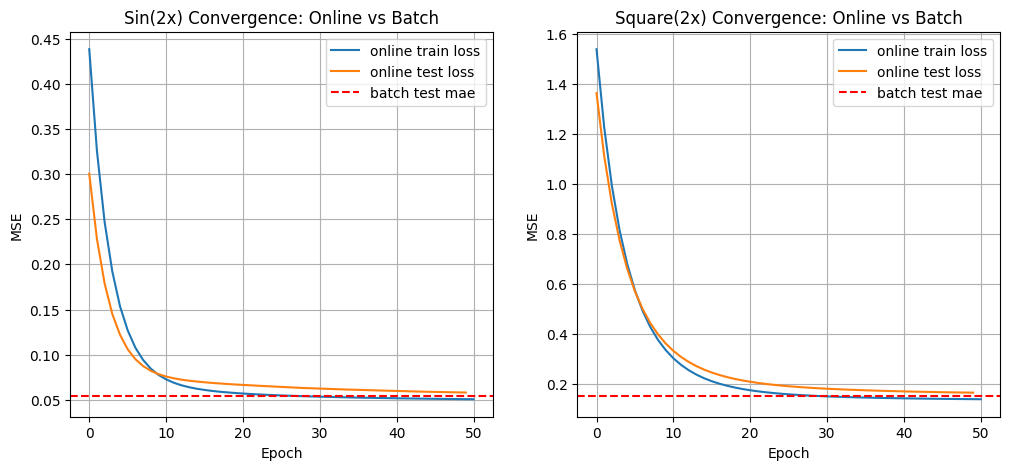

In [53]:
# Plot comparison of batch vs online for fixed sigma and centers
# Used mse for direct comparison
fixed_sigma = 0.5
fixed_centers = 10
fixed_eta = 0.01

centers_fixed = np.linspace(0, 2 * np.pi, fixed_centers)

# Batch
rbf_sin_batch = RBFNetwork(centers_fixed, fixed_sigma)
rbf_sin_batch.fit(x_train, y_sin_train_noise)
mae_batch_sin = mse(y_sin_test_noise, rbf_sin_batch.predict(x_test))

rbf_square_batch = RBFNetwork(centers_fixed, fixed_sigma)
rbf_square_batch.fit(x_train, y_square_train_noise)
mae_batch_square = mse(y_square_test_noise, rbf_square_batch.predict(x_test))

# Online
rbf_sin_online = RBFNetwork(centers_fixed, fixed_sigma)
train_hist_sin, test_hist_sin = rbf_sin_online.fit_online(x_train, y_sin_train_noise, x_test, y_sin_test_noise, fixed_eta, num_epochs)

rbf_square_online = RBFNetwork(centers_fixed, fixed_sigma)
train_hist_square, test_hist_square = rbf_square_online.fit_online(x_train, y_square_train_noise, x_test, y_square_test_noise, fixed_eta, num_epochs)

# Plot convergence
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_hist_sin)), train_hist_sin, label='online train loss')
plt.plot(range(len(test_hist_sin)), test_hist_sin, label='online test loss')
plt.axhline(y=mae_batch_sin, color='red', linestyle='--', label='batch test mae')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Sin(2x) Convergence: Online vs Batch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(len(train_hist_square)), train_hist_square, label='online train loss')
plt.plot(range(len(test_hist_square)), test_hist_square, label='online test loss')
plt.axhline(y=mae_batch_square, color='red', linestyle='--', label='batch test mae')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Square(2x) Convergence: Online vs Batch')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#TODO compare with single-hidden-layer perceptron trained with backprop.
# -> Its the last part of 3.2 that is missing.